In [2]:
import pandas as pd 
df=pd.read_csv('cleaned_dataset.csv')

In [13]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,9223372036854775807,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,9223372036854775807,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,9223372036854775807,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,9223372036854775807,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,9223372036854775807,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,4/29/2019 7:28,451,4/30/2019 6:02,214,81230,208202201200072,33650688697,35483109451938,D20434A,...,16191667,11763428,17883703,19678161,526609673,9197207,3264510,13487416,57628851,574175259
149997,7349883264234609664,4/29/2019 7:28,483,4/30/2019 10:41,187,97970,208201908153249,33663449963,35660508296467,D10223C,...,13877234,8288284,19350146,21293148,626893062,4735033,712180387,2457758,39135081,666648844
149998,9223372036854775807,4/29/2019 7:28,283,4/30/2019 10:46,810,98249,208201711161187,33621890103,35721209870907,T51102A,...,22660510,1855903,9963942,5065760,553539484,13394316,121100856,11314729,34912224,592786405
149999,9223372036854775807,4/29/2019 7:28,696,4/30/2019 10:40,327,97910,208202101098075,33619622058,86186204011457,L88342B,...,8817106,8305402,3322253,13172589,352536971,2529475,814713113,1406930,29626096,371895920


Task 3. 1 - Aggregate, per customer, the following information (treat missing & outliers by replacing with the mean or the mode of the corresponding variable):

•	Average TCP retransmission
	•	Average RTT
	•	Handset type
	•	Average throughput

In [23]:
df['Total TCP Retransmission'] = df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']
df['Total RTT'] = df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']
df['Total Throughput'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Group by 'MSISDN/Number' to aggregate data per customer
tcp_retransmission_per_user = df.groupby('MSISDN/Number')['Total TCP Retransmission'].mean().reset_index()
total_throughput_per_user = df.groupby('MSISDN/Number')['Total Throughput'].mean().reset_index()
total_rtt_per_user = df.groupby('MSISDN/Number')['Total RTT'].mean().reset_index()
handset_type_per_user = df.groupby('MSISDN/Number')['Handset Type'].agg(pd.Series.mode).reset_index()

# Merge the aggregated data
merged_df = df[['MSISDN/Number']].drop_duplicates()  # Start with unique customers
merged_df = merged_df.merge(tcp_retransmission_per_user, on='MSISDN/Number', how='left')
merged_df = merged_df.merge(total_throughput_per_user, on='MSISDN/Number', how='left')
merged_df = merged_df.merge(total_rtt_per_user, on='MSISDN/Number', how='left')
merged_df = merged_df.merge(handset_type_per_user, on='MSISDN/Number', how='left')

# Rename columns for clarity
merged_df.rename(columns={
    'Total TCP Retransmission': 'Average TCP Retransmission',
    'Total Throughput': 'Average Throughput',
    'Total RTT': 'Average RTT'
}, inplace=True)

In [26]:
merged_df

,MSISDN/Number,Average TCP Retransmission,Average Throughput,Average RTT,Handset Type
0,33664962239,13851638.0,313074912.0,83.0,Samsung Galaxy A5 Sm-A520F
1,33681854413,21569572.0,465475406.0,67.0,Samsung Galaxy J5 (Sm-J530)
2,33760627129,21569572.0,307690973.0,126.0,Samsung Galaxy A8 (2018)
3,33750343200,21569572.0,889352748.0,126.0,undefined
4,33699795932,21569572.0,607681403.0,126.0,Samsung Sm-G390F
...,...,...,...,...,...
106852,33645655643,21569572.0,922173944.0,126.0,Samsung Galaxy J5 (Sm-J530)
106853,33668648496,16715462.0,872761860.0,322.0,undefined
106854,33650688697,21569572.0,631804110.0,32.0,Apple iPhone 8 Plus (A1897)
106855,33621890103,21569572.0,627698629.0,49.0,Apple iPhone Xs (A2097)


In [28]:
# Check the missing data type 
merged_df.isna().sum()

MSISDN/Number                 0
Average TCP Retransmission    0
Average Throughput            0
Average RTT                   0
Handset Type                  0
dtype: int64

In [40]:
Q1 = merged_df['Average Throughput'].quantile(0.25)
Q3 = merged_df['Average Throughput'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = merged_df[(merged_df['Average Throughput'] < lower_bound) | (merged_df['Average Throughput'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [MSISDN/Number, Average TCP Retransmission, Average Throughput, Average RTT, Handset Type]
Index: []


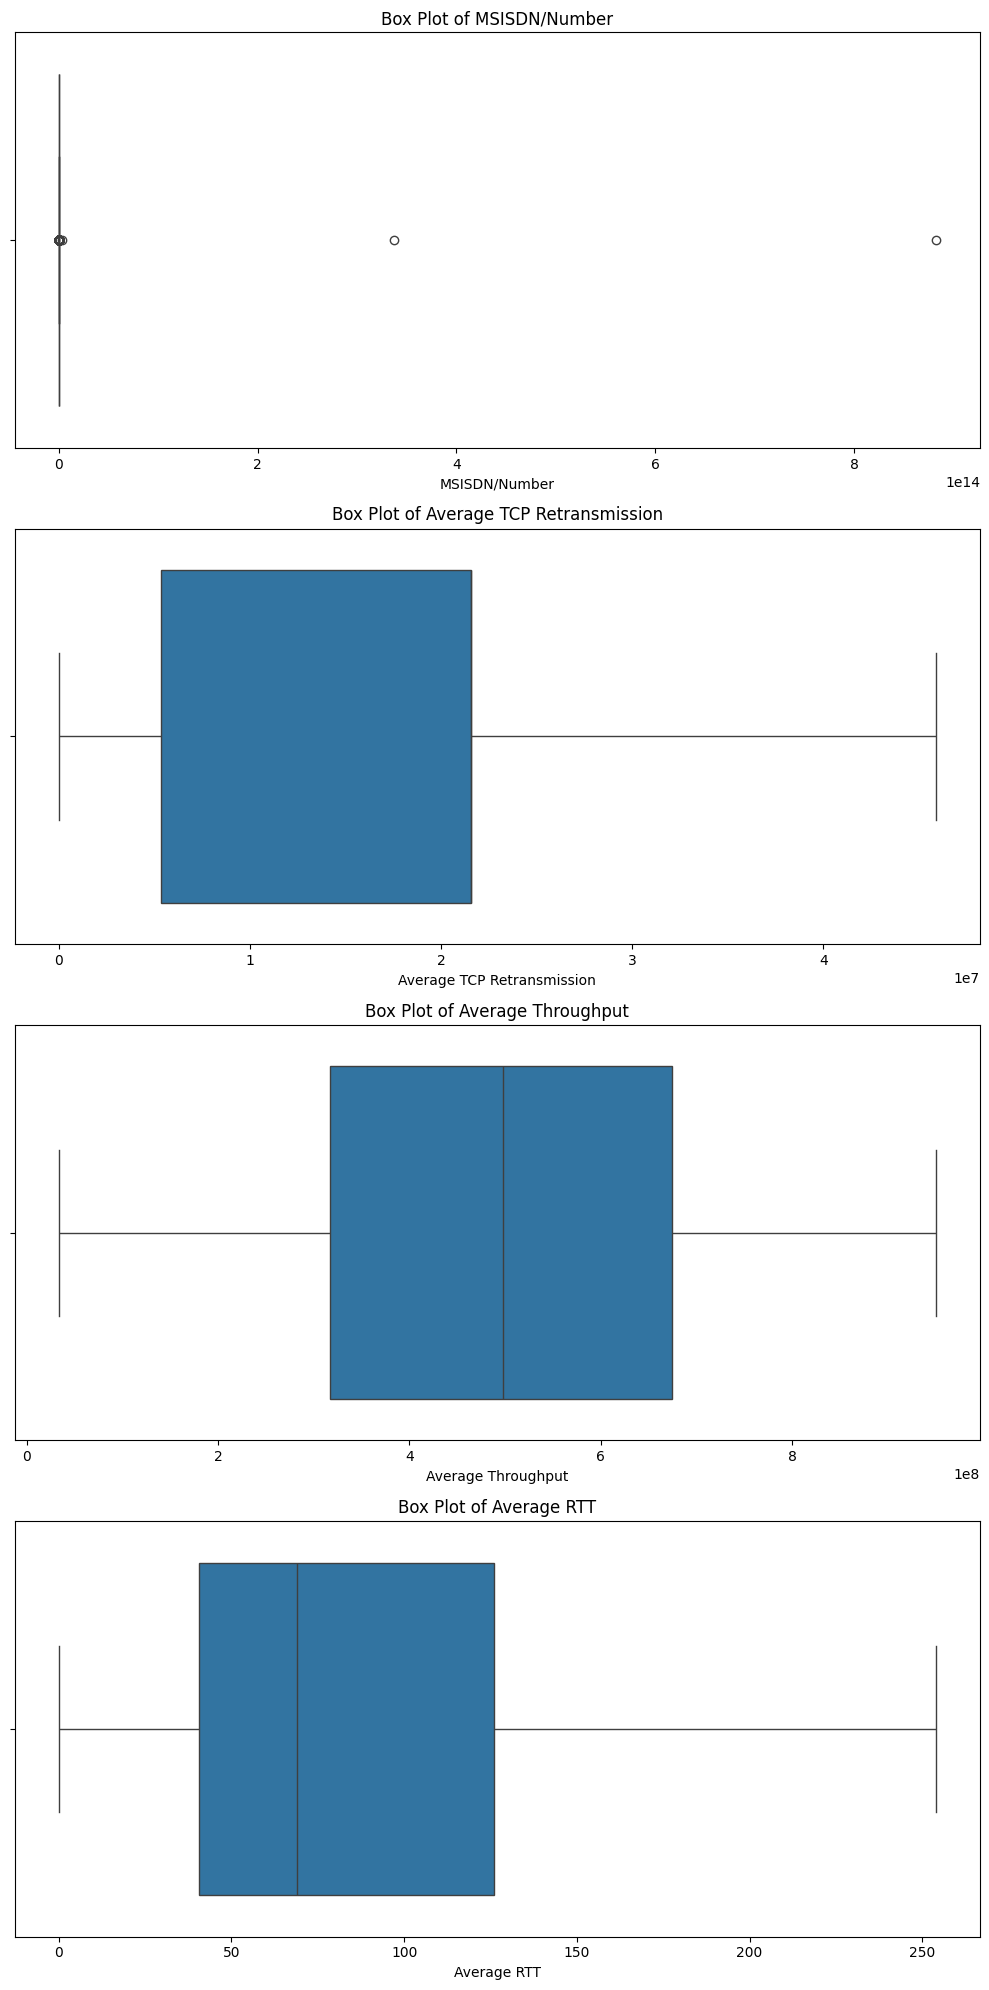

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns 
numeric_columns = merged_df.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 5 * len(numeric_columns)))
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=merged_df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [44]:
Q1 = merged_df['Average RTT'].quantile(0.25)
Q3 = merged_df['Average RTT'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = merged_df[(merged_df['Average RTT'] < lower_bound) | (merged_df['Average RTT'] > upper_bound)]
print(outliers)

Empty DataFrame
Columns: [MSISDN/Number, Average TCP Retransmission, Average Throughput, Average RTT, Handset Type]
Index: []


In [45]:
Q1 = merged_df['MSISDN/Number'].quantile(0.25)
Q3 = merged_df['MSISDN/Number'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = merged_df[(merged_df['MSISDN/Number'] < lower_bound) | (merged_df['MSISDN/Number'] > upper_bound)]
print(outliers)

        MSISDN/Number  Average TCP Retransmission  Average Throughput  \
2         33760627129                  21569572.0         307690973.0   
3         33750343200                  21569572.0         889352748.0   
7         33763490140                    770028.0         579248005.5   
13        33753758738                  13847122.0         101047021.0   
17        33760595345                  21569572.0         532367071.5   
...               ...                         ...                 ...   
106836    33782963897                  21569572.0         948799638.0   
106840    33762386645                    761768.0          75782607.0   
106847    33786632785                  21569572.0         448355059.0   
106850    33761274518                  10787315.0         261317828.0   
106851    33762146363                  21569572.0         352656000.0   

        Average RTT                      Handset Type  
2             126.0          Samsung Galaxy A8 (2018)  
3          

In [47]:
# Task 3.1

Compute & list 10 of the top, bottom, and most frequent:

	a.	TCP values in the dataset. 

	b.	RTT values in the dataset.
    
	c.	Throughput values in the dataset.

In [48]:
# Top and Bottom TCP values
top_tcp_values = merged_df.nlargest(10, 'Average TCP Retransmission')
bottom_tcp_values = merged_df.nsmallest(10, 'Average TCP Retransmission')

# Top and Bottom RTT values
top_rtt_values = merged_df.nlargest(10, 'Average RTT')
bottom_rtt_values = merged_df.nsmallest(10, 'Average RTT')

# Top and Bottom Throughput values
top_throughput_values = merged_df.nlargest(10, 'Average Throughput')
bottom_throughput_values = merged_df.nsmallest(10, 'Average Throughput')

# Display results
print("Top 10 TCP values:")
print(top_tcp_values[['MSISDN/Number', 'Average TCP Retransmission']])
print("\nBottom 10 TCP values:")
print(bottom_tcp_values[['MSISDN/Number', 'Average TCP Retransmission']])

print("\nTop 10 RTT values:")
print(top_rtt_values[['MSISDN/Number', 'Average RTT']])
print("\nBottom 10 RTT values:")
print(bottom_rtt_values[['MSISDN/Number', 'Average RTT']])

print("\nTop 10 Throughput values:")
print(top_throughput_values[['MSISDN/Number', 'Average Throughput']])
print("\nBottom 10 Throughput values:")
print(bottom_throughput_values[['MSISDN/Number', 'Average Throughput']])


Top 10 TCP values:
        MSISDN/Number  Average TCP Retransmission
32872     33666224656                4.589238e+07
2957      33669689766                4.588460e+07
35218     33612868841                4.587149e+07
33499     33763740829                4.583422e+07
3033      33665796738                4.577723e+07
19858     33658055978                4.576257e+07
102680    33660816384                4.573348e+07
102592    33763139891                4.571184e+07
51058     33667472994                4.570651e+07
30598     33650722734                4.569915e+07

Bottom 10 TCP values:
        MSISDN/Number  Average TCP Retransmission
84670     33650128412                        97.0
7408      33614777138                       128.0
76466     33762062356                       129.0
73559     33626357513                       134.0
10622     33607833304                       143.0
18613     33769636458                       176.0
19045     33650681239                       176.0
87271   

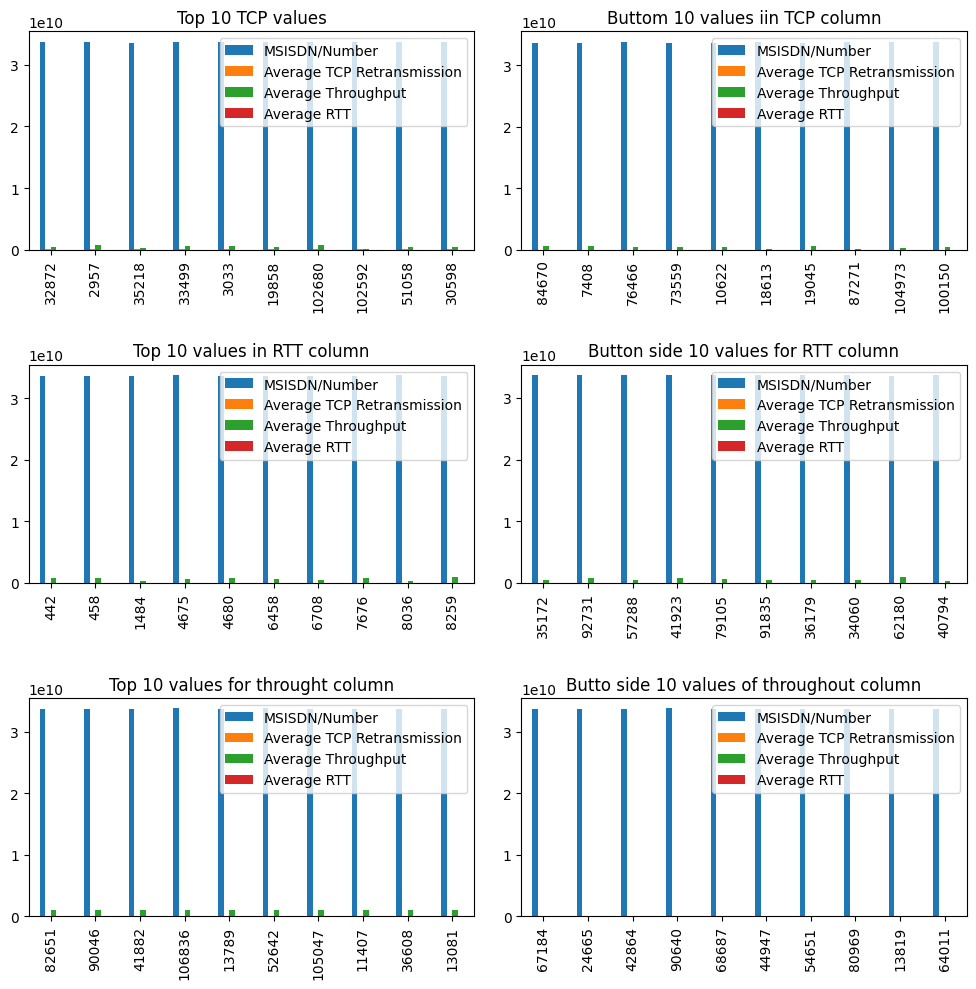

In [50]:
# Plotting the above values 
fig,axes=plt.subplots(3,2,figsize=(10,10))
top_tcp_values.plot(kind='bar',ax=axes[0,0],title='Top 10 TCP values')
bottom_tcp_values.plot(kind='bar', ax=axes[0,1],title='Buttom 10 values iin TCP column')
top_rtt_values.plot(kind='bar',ax=axes[1,0],title='Top 10 values in RTT column')
bottom_rtt_values.plot(kind='bar',ax=axes[1,1],title='Button side 10 values for RTT column')
top_throughput_values.plot(kind='bar',ax=axes[2,0],title='Top 10 values for throught column')
bottom_throughput_values.plot(kind='bar',ax=axes[2,1],title='Butto side 10 values of throughout column')
plt.tight_layout()
plt.show()



In [51]:
# Most frequent TCP values
most_frequent_tcp = merged_df['Average TCP Retransmission'].value_counts().nlargest(10)

# Most frequent RTT values
most_frequent_rtt = merged_df['Average RTT'].value_counts().nlargest(10)

# Most frequent Throughput values
most_frequent_throughput = merged_df['Average Throughput'].value_counts().nlargest(10)

# Display results
print("\nTop 10 most frequent TCP values:")
print(most_frequent_tcp)

print("\nTop 10 most frequent RTT values:")
print(most_frequent_rtt)

print("\nTop 10 most frequent Throughput values:")
print(most_frequent_throughput)



Top 10 most frequent TCP values:
Average TCP Retransmission
2.156957e+07    55974
2.084751e+07     1871
2.081121e+07      367
2.081124e+07      167
7.609880e+05      145
2.119039e+07       82
2.081123e+07       81
7.597500e+05       78
7.623180e+05       78
7.596960e+05       70
Name: count, dtype: int64

Top 10 most frequent RTT values:
Average RTT
126.000000    18623
134.471337     6481
29.000000      2950
39.000000      2367
38.000000      1639
40.000000      1583
30.000000      1577
28.000000      1456
49.000000      1308
41.000000      1207
Name: count, dtype: int64

Top 10 most frequent Throughput values:
Average Throughput
637726002.0    2
321294586.0    2
477037375.0    2
508313029.0    2
375293583.0    2
313074912.0    1
781062186.5    1
721472946.0    1
230367657.0    1
861149458.0    1
Name: count, dtype: int64


In [52]:
merged_df

,MSISDN/Number,Average TCP Retransmission,Average Throughput,Average RTT,Handset Type
0,33664962239,13851638.0,313074912.0,83.000000,Samsung Galaxy A5 Sm-A520F
1,33681854413,21569572.0,465475406.0,67.000000,Samsung Galaxy J5 (Sm-J530)
2,33760627129,21569572.0,307690973.0,126.000000,Samsung Galaxy A8 (2018)
3,33750343200,21569572.0,889352748.0,126.000000,undefined
4,33699795932,21569572.0,607681403.0,126.000000,Samsung Sm-G390F
...,...,...,...,...,...
106852,33645655643,21569572.0,922173944.0,126.000000,Samsung Galaxy J5 (Sm-J530)
106853,33668648496,16715462.0,872761860.0,134.471337,undefined
106854,33650688697,21569572.0,631804110.0,32.000000,Apple iPhone 8 Plus (A1897)
106855,33621890103,21569572.0,627698629.0,49.000000,Apple iPhone Xs (A2097)


# Task no -3.3

 Compute & report:

a.	The distribution of the average throughput per handset type and provide interpretation for your findings.

b.	The average TCP retransmission view per handset type and provide interpretation for your findings.

Task 3.4 - Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster. (The description must define each group based on your understanding of the data)

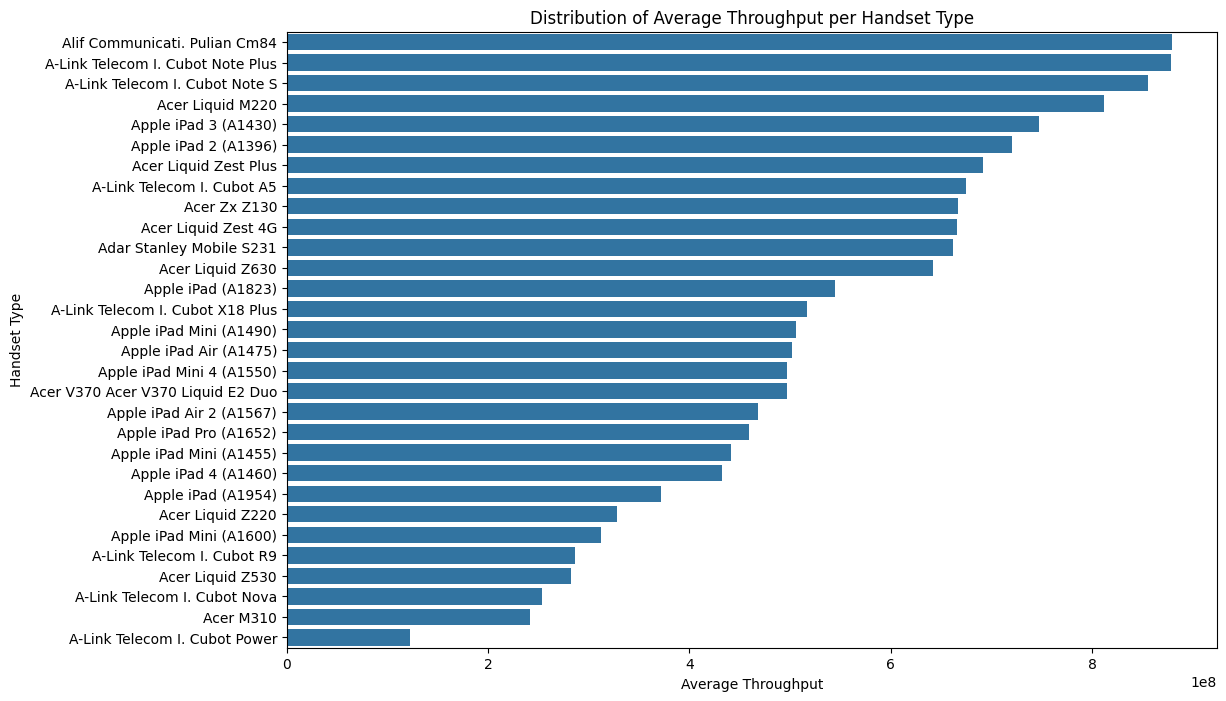

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Handset Type and calculate the mean Average Throughput
throughput_distribution = new_df.groupby('Handset Type')['Average Throughput'].mean().head(30).reset_index()

# Plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Throughput', y='Handset Type', data=throughput_distribution.sort_values(by='Average Throughput', ascending=False))
plt.xlabel('Average Throughput')
plt.ylabel('Handset Type')
plt.title('Distribution of Average Throughput per Handset Type')
plt.show()


conclusion- From the above graph the handset types are arranged with average throughout(sum of Total DL (Bytes) and Total UL (Byte) )

Average Throughtout value is high for Alif commubication .Pulian CM84 (Handset Type)

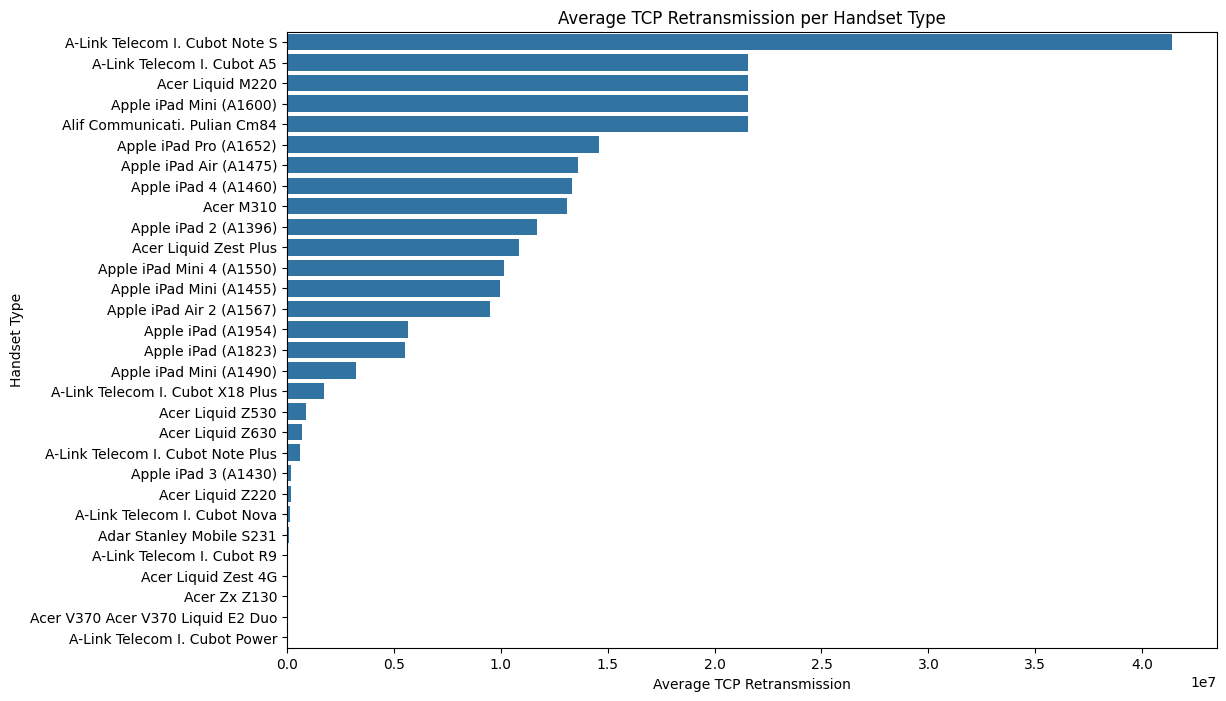

In [59]:
# Group by Handset Type and calculate the mean Average TCP Retransmission
tcp_retransmission_distribution = new_df.groupby('Handset Type')['Average TCP Retransmission'].mean().head(30).reset_index()

# Plot the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='Average TCP Retransmission', y='Handset Type', data=tcp_retransmission_distribution.sort_values(by='Average TCP Retransmission', ascending=False))
plt.xlabel('Average TCP Retransmission')
plt.ylabel('Handset Type')
plt.title('Average TCP Retransmission per Handset Type')
plt.show()


Conclusion- The above bar plot is beteween Average TCP retramission and Handset type

Here A-link Telecom |.cubot note s has more TCP retramission value 

In [70]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the numeric features for clustering
numeric_features = new_df[['Average TCP Retransmission', 'Average Throughput', 'Average RTT']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
new_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Filter numeric columns for aggregation
numeric_columns = new_df.select_dtypes(include=['float64', 'int64']).columns

# Group by Cluster and calculate the mean of numeric features
cluster_description = new_df.groupby('Cluster')[numeric_columns].mean().reset_index()

print(cluster_description)


Cluster Centers:
[[-1.34606314e+00  5.21726075e-04  3.30995403e-01]
 [ 6.08499587e-01 -8.66225435e-01 -1.62516667e-01]
 [ 6.13617153e-01  8.51703116e-01 -1.38209523e-01]]
   Cluster  MSISDN/Number  Average TCP Retransmission  Average Throughput  \
0        0   3.367433e+10                2.757935e+06        4.963636e+08   
1        1   5.796108e+10                2.034839e+07        3.015311e+08   
2        2   4.277387e+10                2.040599e+07        6.880471e+08   

   Average RTT  
0    97.366067  
1    73.931232  
2    75.488202  
